<a href="https://colab.research.google.com/github/Nader-Khalil/DQN_DDQN_implementation/blob/Nader_updates/01_Deep_Q_Learning_Implementation_From_Scratch_with_several_trialsV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Team Members : 
- **Yassmina Abdo**    >>  [Yassmina Abdo || Linkedin](https://www.linkedin.com/in/yassmina-abdo/)  >>> GitHub Acc. :[Yassmina Abdo || Github ](https://github.com/yassmina-abdo)
- **Maryam Mostafa Alsawaf**  >> [Maryam Mostafa || Linkedin](https://www.linkedin.com/in/maryam-mostafa-26a789189/) >>> GitHub Acc. [Maryam Mostafa || Github](https://github.com/Maryam-Mostafa)
- **Nader Mohamed Khalil**  >>  [Nader Khalil || Linkedin](https://www.linkedin.com/in/nader-khalil-30946a213/)  >>>GitHub Acc. [Nader Khalil || Github](https://github.com/Nader-Khalil)


**Mount Drive**

---



In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Installing Dependencies**

In [ ]:
# install gym
!pip install gym --q

     |████████████████████████████████| 1.0 MB 5.3 MB/s 


In [ ]:
# install dependencies needed for recording videos
!apt install -y xvfb x11-utils --q
!sudo apt-get update  --q
!apt install python-opengl --q
!apt install ffmpeg --q
!pip install pyvirtualdisplay --q

!pip install --upgrade pip setuptools wheel --q
!pip install opencv-python --q
 
!pip install pyglet --q
!pip install ale-py==0.7.4 # To overcome an issue with gym (https://github.com/DLR-RM/stable-baselines3/issues/875) --q
!pip install pickle5 --q

#!pip install gym pyvirtualdisplay > /dev/null 2>&1 -
#!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender==1.0.2 --q

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,982 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 994 kB in 0s (2,592 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 155673 fil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Download ROMs
!wget http://www.atarimania.com/roms/Roms.rar
!unrar x -Y "/content/Roms.rar"

In [ ]:
!pip install gym[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ale-py --q

     |████████████████████████████████| 1.6 MB 9.2 MB/s 


In [ ]:
from ale_py import ALEInterface

ale = ALEInterface()

In [ ]:
# import atari_py==0.2.6
# Import ROMs into gym using Arcade Learning Environment (ALE)
!ale-import-roms /content/ROMS/

In [ ]:
!ale-import-roms --q

/bin/bash: ale-import-roms: command not found


In [ ]:
# !pip install gym pyvirtualdisplay > /dev/null 2>&1
# !pip install colabgymrender==1.0.2 --q


**Importing Libraries**

In [ ]:
# LA libraries 
import numpy as np

# imports for the enviroment 
import gym
# from ale_py import ALEInterface
# ale = ALEInterface()

# for the Algorithms impl.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mean_squared_error
from keras.callbacks import TensorBoard



# for Visulaization and Video Capturing 
from matplotlib import pyplot as plt
from base64 import b64encode
from gym.wrappers.monitoring.video_recorder import VideoRecorder
# start an instance of the virtual display
from pyvirtualdisplay import Display
display = Display(visible=False, size=(1400, 900))
_ = display.start()

from IPython.display import clear_output
from time import sleep
# Virtual display
from pyvirtualdisplay import Display

# virtual_display = Display(visible=0, size=(1400, 900))
# virtual_display.start()

In [ ]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop


the next two function is for prepration only we define a preprocessing function for our input game screens. We crop the image size convert the image into greyscale 1D tensor



# Preprocessing for each screen before sending it to the model 

In [ ]:
# Helpful preprocessing taken from github.com/ageron/tiny-dqn
def process_frame(frame):

    mspacman_color = np.array([210, 164, 74]).mean()
    img = frame[1:176:2, ::2]    # Crop and downsize
    img = img.mean(axis=2)       # Convert to greyscale
    img[img==mspacman_color] = 0 # Improve contrast by making pacman white
    img = (img - 128) / 128 - 1  # Normalize from -1 to 1.
    
    return np.expand_dims(img.reshape(88, 80, 1), axis=0)

In [ ]:
# Averages images from the last few frame
def  blend_images (images, blend):
    avg_image = np.expand_dims(np.zeros((88, 80, 1), np.float64), axis=0)

    for image in images:
        avg_image += image
        
    if len(images) < blend:
        return avg_image / len(images)
    else:
        return avg_image / blend

# Visualizaing the enviroment 

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


9
['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT']


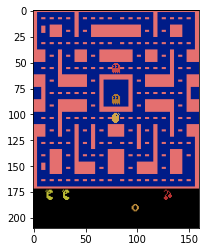

In [ ]:
env = gym.make("MsPacman-v0")
n_outputs = env.action_space.n
print(n_outputs)
print(env.env.get_action_meanings())

observation = env.reset()

import tensorflow as tf
import matplotlib.pyplot as plt


for i in range(22):
  
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, _, _, _ = env.step(1)
  

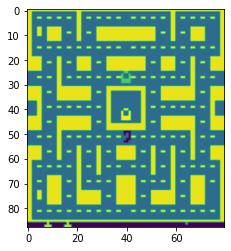

(210, 160, 3)
(88, 80)


In [ ]:
#Take a look at the preprocessed inputs in greyscale
#Let's compare the original and preprocessed tensors.

obs_preprocessed = process_frame(observation).reshape(88,80)
plt.imshow(obs_preprocessed)
plt.show()
print(observation.shape)
print(obs_preprocessed.shape)

In [ ]:
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print(f"The observation space: {obs_space}")
print(f"The action space: {action_space}")

The observation space: Box(0, 255, (210, 160, 3), uint8)
The action space: Discrete(9)


In [ ]:
type(action_space)

gym.spaces.discrete.Discrete

# **Implementation of the Algorithm**

**Introdction for the Deep Q Learning Algorithm :** 

Now, let's define our model. But first, let quickly recap what a DQN is.

DQN algorithm
-------------

Our environment is deterministic, so all equations presented here are
also formulated deterministically for the sake of simplicity. In the
reinforcement learning literature, they would also contain expectations
over stochastic transitions in the environment.

Our aim will be to train a policy that tries to maximize the discounted,
cumulative reward

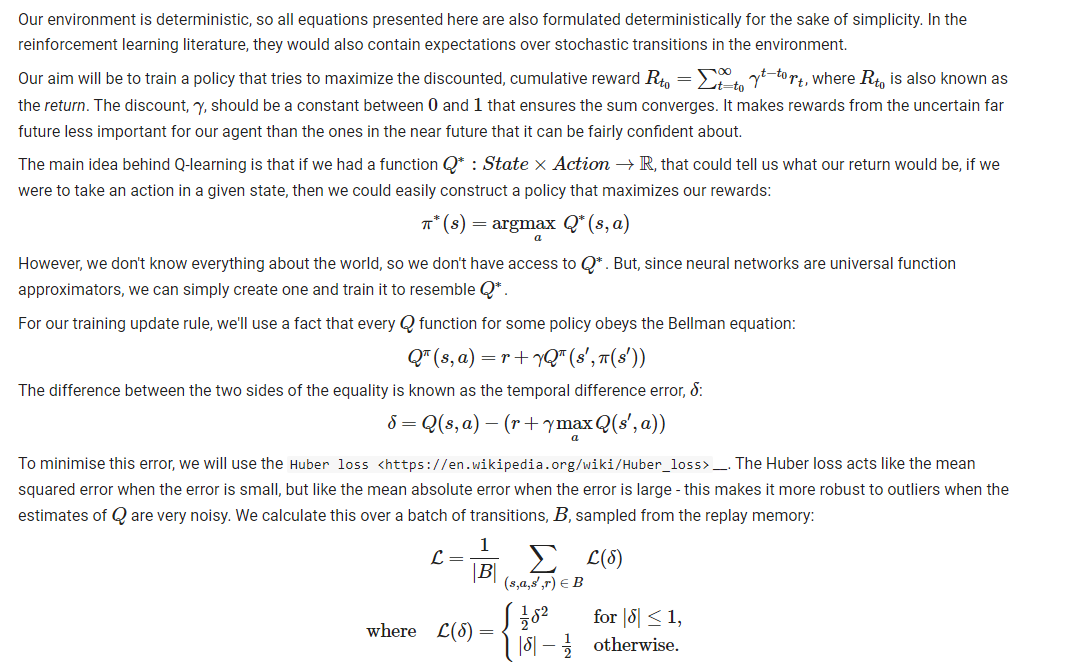


Okay, Now we define a class called DDQN_Agent for building our Double Deep Q network.  <br>
We build Q network with three convolutional layers with same padding followed by a flattening, and a three dense layers followed by  fully connected layer. 

In [ ]:
class DDQN_Agent:
    #
    # Initializes attributes and constructs CNN model and target_model
    #
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=100000)
        
        # Hyperparameters
        self.gamma = 0.99           # Discount rate
        self.epsilon = 1.0          # Exploration rate
        self.epsilon_min = 0.1      # Minimal exploration rate (epsilon-greedy)
        self.epsilon_decay = 0.995  # Decay rate for epsilon
        self.update_rate = 10000    # Number of steps until updating the target network
        
        # Construct DQN models
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.target_model.set_weights(self.model.get_weights())
        self.model.summary()

    #
    # Constructs CNN the archticture little small to make the run more realiable 
    #
    def _build_model(self):
        model = Sequential()
        
        # Conv Layers
        model.add(Conv2D(32, (8, 8), strides=4, padding='same', input_shape=self.state_size))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (4, 4), strides=2, padding='same'))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3), strides=1, padding='same'))
        model.add(Activation('relu'))
        model.add(Flatten())

        # FC Layers
        model.add(Dense(128, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        
        model.compile(loss='mse', optimizer=RMSprop(lr=0.00025, rho=0.95, epsilon=None, decay=0.0)
)
        return model

    #
    # Stores experience in replay memory
    #
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    #
    # Chooses action based on epsilon-greedy policy
    #
    def act(self, state):
        # Random exploration
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        
        act_values = self.model.predict(state)
        
        return np.argmax(act_values[0])  # Returns action using policy

    #
    # Trains the model using randomly selected experiences in the replay memory
    #
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        
        for state, action, reward, next_state, done in minibatch:
            
            if not done:
                max_action = np.argmax(self.model.predict(next_state)[0])
                target = (reward + self.gamma * self.target_model.predict(next_state)[0][max_action])
            else:
                target = reward
                
            # Construct the target vector as follows:
            # 1. Use the current model to output the Q-value predictions
            target_f = self.model.predict(state)
            
            # 2. Rewrite the chosen action value with the computed target
            target_f[0][action] = target
            
            # 3. Use vectors in the objective computation
            self.model.fit(state, target_f, epochs=1, verbose=0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    #
    # Sets the target model parameters to the current model parameters
    #
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())
            
    #
    # Loads a saved model
    #
    def load(self, name):
        self.model.load_weights(name)

    #
    # Saves parameters of a trained model
    #
    def save(self, name):
        self.model.save_weights(name)